In [461]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Newton Raphson

In [462]:
# Define la función f(x)
x = sp.Symbol('x')
f = sp.cos(x) - x

# Define la derivada f'(x)
df = f.diff(x)

# Define la función f(x) como una función lambda
f_func = sp.lambdify(x, f)

# Define la derivada f'(x) como una función lambda
df_func = sp.lambdify(x, df)

# Define el número de iteraciones y el valor inicial
N = 10
x = 1.0

# Ejecuta el método de Newton-Raphson
for i in range(1, N+1):
    x = x - f_func(x)/df_func(x)
    print(f"n= {str(i)}, error = {x}")

# Guarda la raíz aproximada en la variable 'root'
root = x

# Imprime la raíz aproximada
print("La raíz aproximada es:", root)


n= 1, error = 0.7503638678402439
n= 2, error = 0.7391128909113617
n= 3, error = 0.739085133385284
n= 4, error = 0.7390851332151607
n= 5, error = 0.7390851332151607
n= 6, error = 0.7390851332151607
n= 7, error = 0.7390851332151607
n= 8, error = 0.7390851332151607
n= 9, error = 0.7390851332151607
n= 10, error = 0.7390851332151607
La raíz aproximada es: 0.7390851332151607


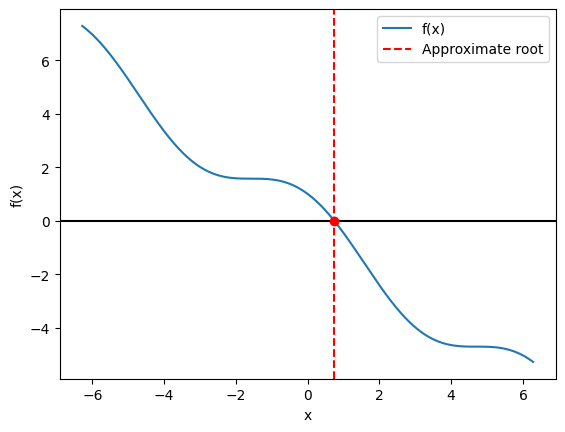

In [463]:
# Plot the function f(x) and the approximate root
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_vals = f_func(x_vals)
root_y = f_func(root)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x)')
ax.axhline(y=0, color='k')
ax.axvline(x=root, color='r', linestyle='--', label='Approximate root')
ax.plot(root, root_y, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

# Metodo del Secante

In [464]:
# Definir la función f(x) que queremos encontrar la raíz
f = lambda x: sp.cos(x) - x

# Definir los valores iniciales para x0 y x1
x0 = 0.0
x1 = 1.0

# Calcular el valor de f(x0)
f0 = f(x0)

# Inicializar algunas variables
x = 0.0  # Variable auxiliar para almacenar la última aproximación
errors = []  # Lista para almacenar los errores relativos de cada iteración
xs = []  # Lista para almacenar todas las aproximaciones
iter = 11  # Número máximo de iteraciones

# Iterar el método de la secante
for i in range(2, iter+2):
    # Calcular el valor de f(x1)
    f1 = f(x1)
    
    # Si f(x1) - f(x0) es cero, entonces la aproximación anterior es la raíz
    if f1 - f0 == 0:
        x = x1
    else:
        # Calcular la nueva aproximación
        x_prev = x
        x = x1 - (x1 - x0)*f1/(f1 - f0)
        x0 = x1
        f0 = f1
    
    # Actualizar x1 con la nueva aproximación
    x1 = x
    
    # Calcular el error relativo y agregarlo a la lista de errores
    error = abs((x - x_prev)/x) if x != 0 else 0  # evitar división por cero
    errors.append(error)
    
    # Agregar la nueva aproximación a la lista de xs
    xs.append(x)
    
    # Imprimir la información de la iteración actual
    print("n=" + str(i-1) + ", raiz = " + str(x) + ", error: " + str(error))

# Imprimir el valor final aproximado de x
print("Valor aproximado final: " + str(xs[-1]))


n=1, raiz = 0.685073357326045, error: 1.00000000000000
n=2, raiz = 0.736298997613654, error: 0.0695717914239069
n=3, raiz = 0.739119361911629, error: 0.00381584415632246
n=4, raiz = 0.739085112127464, error: 4.63407848479760e-5
n=5, raiz = 0.739085133215001, error: 2.85319463689067e-8
n=6, raiz = 0.739085133215161, error: 2.15709962454028e-13
n=7, raiz = 0.739085133215161, error: 0
n=8, raiz = 0.739085133215161, error: 0
n=9, raiz = 0.739085133215161, error: 0
n=10, raiz = 0.739085133215161, error: 0
n=11, raiz = 0.739085133215161, error: 0
Valor aproximado final: 0.739085133215161


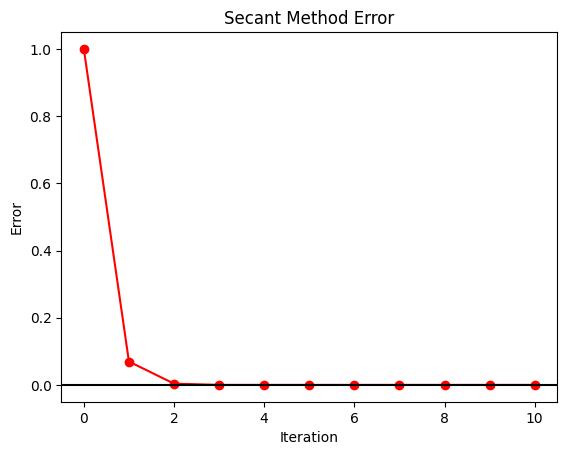

In [465]:
# plot the errors with a line at y=0
plt.plot(errors, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Secant Method Error')
plt.axhline(y=0, color='k')
plt.show()